In [32]:
import os
import random
import numpy as np
import pandas as pd

In [33]:
images_df = pd.read_csv('./data/image_data.csv')
images_df.head()

,id,file_name,category
0,0,img-000000.jpeg,parrot
1,1,img-000001.jpeg,crow
2,2,img-000002.jpeg,sunflower
3,3,img-000003.jpeg,parrot
4,4,img-000004.jpeg,crow


In [34]:
n = 4 # select four random images
images_data = np.array(images_df)

images_ar = images_data[np.random.choice(len(images_data), n, replace = False)]
images_ar

array([[1, 'img-000001.jpeg', 'crow'],
       [0, 'img-000000.jpeg', 'parrot'],
       [7, 'img-000007.jpeg', 'sunflower'],
       [3, 'img-000003.jpeg', 'parrot']], dtype=object)

In [35]:
from PIL import Image

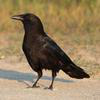

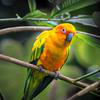

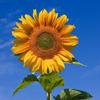

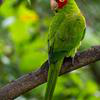

In [36]:
images = [Image.open('./images/' + img[1]) for img in images_ar]

for image in images:
    display(image) 

image size:  (100, 100)


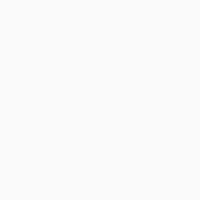

In [37]:
image_size = images[0].size
print('image size: ', image_size)

merged_image = Image.new('RGB',(2 * image_size[0], 2 * image_size[1]), (250,250,250))
display(merged_image)

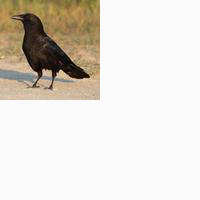

In [38]:
merged_image.paste(images[0], (0, 0))
display(merged_image)

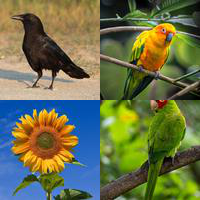

In [39]:
# 0 1
# 2 3
coords = [(0, 0), (image_size[0], 0), (0, image_size[1]), image_size]
for i in range(4):
    merged_image.paste(images[i], coords[i])

display(merged_image)

In [40]:
import csv

random_id = random.randint(0, 1e6)
file_name = 'test-img' + str(random_id).zfill(6) 

with open('./captcha/' + file_name + '.csv', 'w') as csv_file:
    property_file = csv.writer(csv_file)
    property_file.writerow([img[2] for img in images_ar])
    merged_image.save('./captcha/' + file_name + '.jpeg')